# Boston housing data
1.  CRIM      per capita crime rate by town
2.  ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3.  INDUS     proportion of non-retail business acres per town
4.  CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5.  NOX       nitric oxides concentration (parts per 10 million)
6.  RM        average number of rooms per dwelling
7.  AGE       proportion of owner-occupied units built prior to 1940
8.  DIS       weighted distances to five Boston employment centres
9.  RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

## Julia
- Install julia from  https://julialang.org/downloads/
- To add packages, switch to package mode by typing `]`, then `add <package>`
- Reopen vscode and select Julia kernel
- Can activate environment using `activate home_project` and this will create Project and Manifest files

In [16]:
# setup environment using toml files in current directory
cd(@__DIR__)
using Pkg
Pkg.activate(".")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("Distributions")
# Pkg.add("Blink")
Pkg.add("StatsPlots")
Pkg.add("GR")
Pkg.add("CSV")



  Activating environment at `~/ManningLiveProjects/julia/Project.toml`
   Resolving package versions...
  No Changes to `~/ManningLiveProjects/julia/Project.toml`
  No Changes to `~/ManningLiveProjects/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `~/ManningLiveProjects/julia/Project.toml`
  No Changes to `~/ManningLiveProjects/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `~/ManningLiveProjects/julia/Project.toml`
  No Changes to `~/ManningLiveProjects/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `~/ManningLiveProjects/julia/Project.toml`
  No Changes to `~/ManningLiveProjects/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `~/ManningLiveProjects/julia/Project.toml`
  No Changes to `~/ManningLiveProjects/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `~/ManningLiveProjects/julia/Project.toml`
  No Changes to `~/ManningLiveProjects/julia/Manifest.toml`
   Resolving pack

1.1 Download dataset

In [6]:
using Downloads

function f()    
    if isfile("housing.data") == false
        Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data","./data/housing.data")
        Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names","./data/housing.names")
    end
end

f()

1.2 Compute and verify hash of downloaded file


In [7]:
using SHA

expected = bytes2hex([0xad, 0xfa, 0x6b, 0x6d, 0xca,
0x24, 0xa6, 0x3f, 0xe1, 0x66,
0xa9, 0xe7, 0xfa, 0x01, 0xce,
0xe4, 0x33, 0x58, 0x57, 0xd1])

#open downloaded file and compute hash
open("housing.data") do f
    result = bytes2hex(sha1(f))
    println("hash match: ", result == expected, " = ", result)    
end

hash match: true = adfa6b6dca24a63fe166a9e7fa01cee4335857d1


1.3 Loading data into dataframe: https://github.com/bkamins/
Julia-DataFrames-Tutorial

In [32]:
# need to install DataFrames package for the following
ENV["COLUMNS"]= 50
using DataFrames, Random, DelimitedFiles, CSV

#df = DataFrame(readdlm("housing.data"), [:CRIM,:ZN,:INDUS,:CHAS,:NOX,:RM,:AGE,:DIS,:RAD,:TAX,:PTRATIO,:B,:LSTAT,:MEDV])
df = CSV.read("./data/housing.data", DataFrame; header=[:CRIM,:ZN,:INDUS,:CHAS,:NOX,:RM,:AGE,:DIS,:RAD,:TAX,:PTRATIO,:B,:LSTAT,:MEDV], 
    ignorerepeated=true,delim=' ', threaded=false, tasks=1)



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.9,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.6,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.9,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5


1.4. Variable characterisitics
- Nominal variables
    - CHAS
- Continuous are the rest

In [35]:
names(df)
nominal_vars = names(df, Int64)
continous_vars = names(df, Float64)

12-element Vector{String}:
 "CRIM"
 "ZN"
 "INDUS"
 "NOX"
 "RM"
 "AGE"
 "DIS"
 "TAX"
 "PTRATIO"
 "B"
 "LSTAT"
 "MEDV"

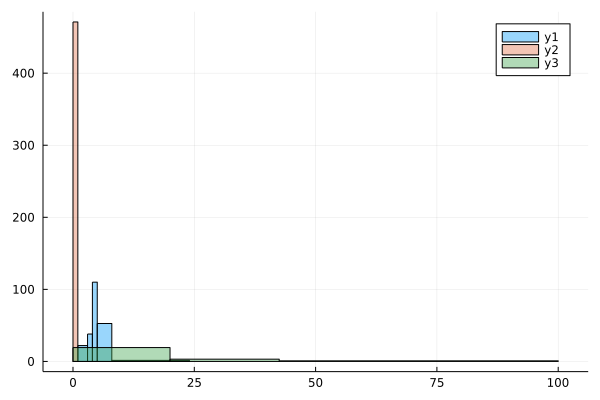

In [10]:
using StatsPlots


ea_histogram([df.RAD, df.CHAS, df.ZN], bins= :scott, fillalpha = 0.4)

1.6 Distribution of continous variables

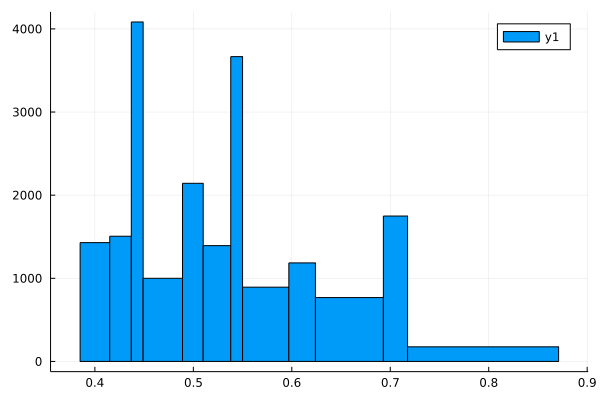

In [11]:
using StatsPlots
ea_histogram([df.NOX])

#using StatsPlots
#ea_histogram([df.CRIM])

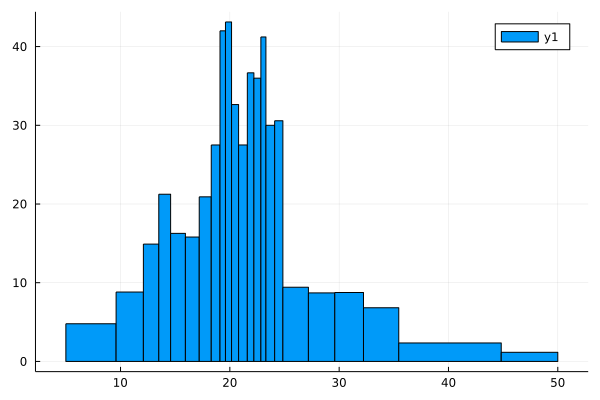

In [12]:
using StatsPlots
ea_histogram(df.MEDV)

   Resolving package versions...
  No Changes to `~/ManningLiveProjects/julia/Project.toml`
  No Changes to `~/ManningLiveProjects/julia/Manifest.toml`


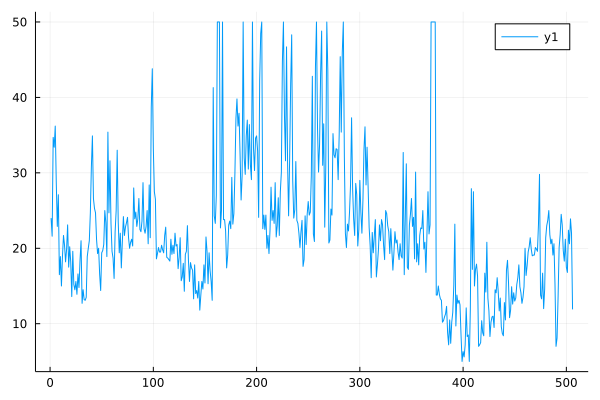

In [13]:
Pkg.add("Distributions")
using Distributions
plot(df.MEDV)

1.7 Remove MEDV where = 50

In [14]:
df = filter(row -> !(row.MEDV == 50 ),  df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0
6,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0
7,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0
8,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0
9,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0


1.8 Kendalls's Tau correlation

In [15]:
using StatsPlots
gr(size=(600,600))
Pkg.add("StatsBase")
using StatsBase
@df df corkendall(df)

   Resolving package versions...
  No Changes to `~/ManningLiveProjects/julia/Project.toml`
  No Changes to `~/ManningLiveProjects/julia/Manifest.toml`


LoadError: MethodError: no method matching corkendall(::DataFrame)
[0mClosest candidates are:
[0m  corkendall([91m::AbstractVector{T} where T<:Real[39m, [91m::AbstractVector{T} where T<:Real[39m) at /home/allan/.julia/packages/StatsBase/IiL4F/src/rankcorr.jl:176
[0m  corkendall([91m::AbstractVector{T} where T<:Real[39m, [91m::AbstractMatrix{T} where T<:Real[39m) at /home/allan/.julia/packages/StatsBase/IiL4F/src/rankcorr.jl:183
[0m  corkendall([91m::AbstractMatrix{T} where T<:Real[39m) at /home/allan/.julia/packages/StatsBase/IiL4F/src/rankcorr.jl:189
[0m  ...